<a href="https://colab.research.google.com/github/LCR2001/AI_Thinking/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/Colab Notebooks"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_공개.csv', encoding= 'UTF-8')
print('train_data dataset shape: ', df.shape)

df.head()

train_data dataset shape:  (60000, 13)


,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
0,0,18371,2,172,104.0,156,96,1,1,0,0,0,1
1,1,14455,1,164,62.0,110,70,1,1,0,0,1,0
2,2,17533,2,177,86.0,120,80,1,1,0,0,1,0
3,3,16010,2,175,88.0,120,80,1,1,0,0,1,1
4,4,16091,1,165,88.0,130,90,1,1,0,0,0,0


In [ ]:
df_test=pd.read_csv('test_공개.csv', encoding = 'UTF-8')
print('test_data dataset shape: ', df_test.shape)

df_test.head()

test_data dataset shape:  (10000, 12)


,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
0,0,21055,1,149,55.0,120,80,1,1,0,0,1
1,1,21908,2,168,64.0,120,79,2,1,0,0,1
2,2,21147,2,172,106.0,120,80,1,1,0,0,0
3,3,19770,1,164,119.0,150,77,2,2,0,1,1
4,4,20587,2,172,69.0,120,80,2,1,1,0,0


In [ ]:
# 상관계수 확인
# 한 변수가 증가할 때 다른 변수 감소 : 음수
# 두 변수가 동시에 증가 or 감소 : 양수
df.corr()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
id,1.000000,0.002772,0.002721,0.003334,-0.000463,0.007663,-0.001507,-0.002070,-0.004014,0.005245,0.008477,-0.002346,-0.001085
나이,0.002772,1.000000,-0.024109,-0.081302,0.054133,0.019148,0.016440,0.154832,0.097959,-0.047598,-0.027399,-0.007522,0.241893
성별,0.002721,-0.024109,1.000000,0.498618,0.153510,0.005118,0.013341,-0.036755,-0.023283,0.340015,0.170605,0.004922,0.005858
키,0.003334,-0.081302,0.498618,1.000000,0.286028,0.005542,0.004702,-0.048827,-0.020154,0.189203,0.092942,-0.008395,-0.012858
몸무게,-0.000463,0.054133,0.153510,0.286028,1.000000,0.028661,0.042636,0.139712,0.103585,0.067637,0.066061,-0.017350,0.183530
수축기 혈압,0.007663,0.019148,0.005118,0.005542,0.028661,1.000000,0.014630,0.022137,0.011199,-0.001957,0.000879,-0.000090,0.051684
이완기 혈압,-0.001507,0.016440,0.013341,0.004702,0.042636,0.014630,1.000000,0.024206,0.011552,0.004010,0.012363,0.003628,0.066142
콜레스테롤,-0.002070,0.154832,-0.036755,-0.048827,0.139712,0.022137,0.024206,1.000000,0.452218,0.009819,0.036774,0.010846,0.221432
포도당,-0.004014,0.097959,-0.023283,-0.020154,0.103585,0.011199,0.011552,0.452218,1.000000,-0.006230,0.010152,-0.005831,0.090992
흡연,0.005245,-0.047598,0.340015,0.189203,0.067637,-0.001957,0.004010,0.009819,-0.006230,1.000000,0.339536,0.024418,-0.017309


In [ ]:
df["label"].value_counts()  # 0인 사람이 더 많음

0    30018
1    29982
Name: label, dtype: int64

In [ ]:
# id 컬럼 삭제
df.drop(['id'], axis = 1,   inplace = True)
df_test.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.info() # id인덱스 잘 사라졌는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      60000 non-null  int64  
 1   성별      60000 non-null  int64  
 2   키       60000 non-null  int64  
 3   몸무게     60000 non-null  float64
 4   수축기 혈압  60000 non-null  int64  
 5   이완기 혈압  60000 non-null  int64  
 6   콜레스테롤   60000 non-null  int64  
 7   포도당     60000 non-null  int64  
 8   흡연      60000 non-null  int64  
 9   음주      60000 non-null  int64  
 10  신체활동    60000 non-null  int64  
 11  label   60000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.5 MB


In [ ]:
# 속도 향상을 위해 int64 -> int32 , float64 -> float32
columns = ['나이', '성별', '키', '몸무게', '수축기 혈압', '이완기 혈압', '콜레스테롤', '포도당', '흡연', '음주','신체활동', 'label']
columns.remove("몸무게")
df[columns] = df[columns].astype(np.int32)
df["몸무게"] = df["몸무게"].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      60000 non-null  int32  
 1   성별      60000 non-null  int32  
 2   키       60000 non-null  int32  
 3   몸무게     60000 non-null  float32
 4   수축기 혈압  60000 non-null  int32  
 5   이완기 혈압  60000 non-null  int32  
 6   콜레스테롤   60000 non-null  int32  
 7   포도당     60000 non-null  int32  
 8   흡연      60000 non-null  int32  
 9   음주      60000 non-null  int32  
 10  신체활동    60000 non-null  int32  
 11  label   60000 non-null  int32  
dtypes: float32(1), int32(11)
memory usage: 2.7 MB


In [ ]:
# test_data에서의 몸무게도 float32로 변환
columns.remove("label")
df_test[columns] = df_test[columns].astype(np.int32)
df_test["몸무게"] = df["몸무게"].astype(np.float32)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      10000 non-null  int32  
 1   성별      10000 non-null  int32  
 2   키       10000 non-null  int32  
 3   몸무게     10000 non-null  float32
 4   수축기 혈압  10000 non-null  int32  
 5   이완기 혈압  10000 non-null  int32  
 6   콜레스테롤   10000 non-null  int32  
 7   포도당     10000 non-null  int32  
 8   흡연      10000 non-null  int32  
 9   음주      10000 non-null  int32  
 10  신체활동    10000 non-null  int32  
dtypes: float32(1), int32(10)
memory usage: 429.8 KB


In [ ]:
df.describe() # [키, 몸무게, 수축기 혈압, 이완기 혈압] 에서의 이상치 값 존재 예측

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,19468.299417,1.349317,164.356983,74.226089,129.134883,96.921717,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,2465.005682,0.476758,8.220935,14.398274,166.156717,193.061880,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,10859.000000,1.000000,57.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#키, 몸무게, 수축기 혈압, 이완기 혈압에 대한 정보(최소, 최대) 출력
print("최솟값")
print(df[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(),end = '\n\n')

print('최댓값')
print(df[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max(),end = '\n\n')

최솟값
키          57.0
몸무게        10.0
수축기 혈압   -150.0
이완기 혈압    -70.0
dtype: float64

최댓값
키           250.0
몸무게         200.0
수축기 혈압    16020.0
이완기 혈압    11000.0
dtype: float64



In [ ]:
# 한글 폰트 작성을 위한 환경 구축
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


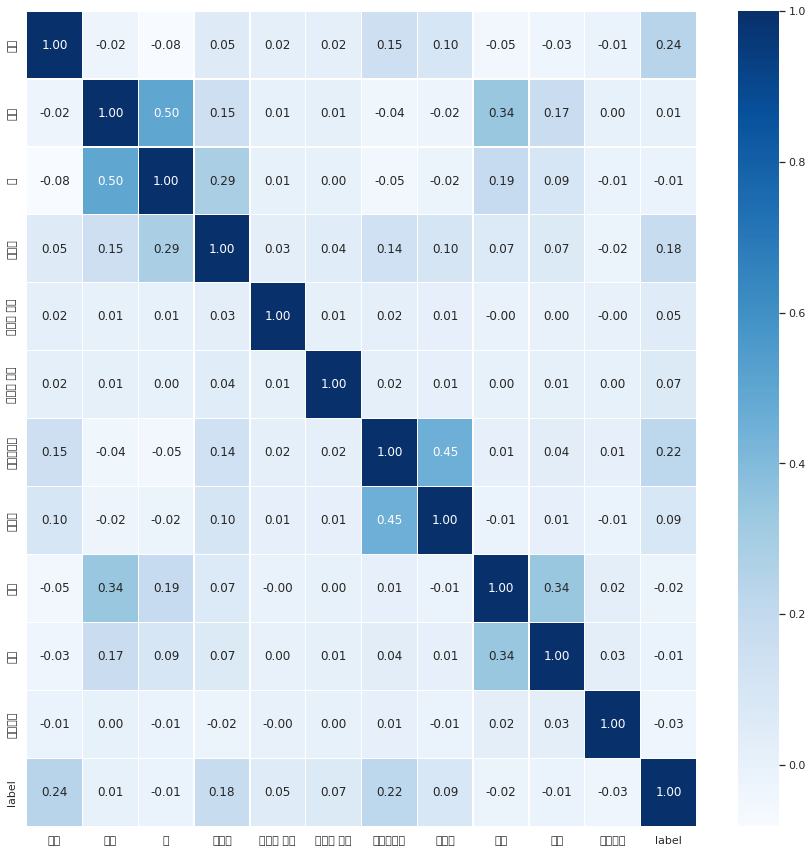

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 한글 깨짐 방지
plt.rc("font", family = "NanumGothic")
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False})

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
# fig = plt.figure(figsize=(15,15))
# ax1 = fig.add_subplot(1,2,1)

# sns.regplot(x=df.corr(),y=df.corr(),data=df ax=ax1)
# plt.show

In [ ]:
# 아웃라이어 확인 및 이상치 대체
def imputation_outlier(df=None, column=None, weight=1.5):
  df_copy = df.copy()
  fraud_male =  df_copy[df_copy['성별']==2][column]
  fraud_female = df_copy[df_copy['성별']==1][column]
  mquantile_25 = np.percentile(fraud_male.values,25)
  mquantile_75 = np.percentile(fraud_male.values, 75)
  fequantile_25 = np.percentile(fraud_female.values,25)
  fequantile_75 = np.percentile(fraud_female.values, 75)

  iqr_male = mquantile_75 -mquantile_25
  iqr_male_weight = iqr_male * weight

  lowest_male_val = mquantile_25 - iqr_male_weight
  highest_male_val = mquantile_75 + iqr_male_weight

  iqr_female = fequantile_75 -fequantile_25
  iqr_female_weight = iqr_female * weight

  lowest_female_val = fequantile_25 - iqr_female_weight
  highest_female_val = fequantile_75  + iqr_female_weight
  print("lowest_male_val : ", lowest_male_val)
  print("highest_male_val : ", highest_male_val)
  print("lowest_female_val : ", lowest_female_val)
  print("highest_female_val : ", highest_female_val)

  idx_male_highest = df_copy[(df["성별"] == 2) & (df_copy[column] > highest_male_val)].index
  df_copy[column].loc[idx_male_highest] = highest_male_val

  idx_male_lowest = df_copy[(df["성별"] == 2) & (df_copy[column] < lowest_male_val)].index
  df_copy[column].loc[idx_male_lowest] = lowest_male_val

  idx_female_highest = df_copy[(df["성별"] == 1) & (df_copy[column] > highest_female_val)].index
  df_copy[column].loc[idx_female_highest] = highest_female_val

  idx_female_lowest = df_copy[(df["성별"] == 1) & (df_copy[column] < lowest_female_val)].index
  df_copy[column].loc[idx_female_lowest] = lowest_female_val
  
  return df_copy

In [ ]:
# 아웃라이어 대체
df_impu_outlier1 = imputation_outlier(df.copy(), "키")
df_impu_outlier2 = imputation_outlier(df_impu_outlier1, "몸무게")
df_impu_outlier3 = imputation_outlier(df_impu_outlier2, "수축기 혈압")
df_impu_outlier4 = imputation_outlier(df_impu_outlier3, "이완기 혈압")
df_impu_outlier = df_impu_outlier4

lowest_male_val :  154.0
highest_male_val :  186.0
lowest_female_val :  145.0
highest_female_val :  177.0
lowest_male_val :  42.5
highest_male_val :  110.5
lowest_female_val :  37.5
highest_female_val :  105.5
lowest_male_val :  90.0
highest_male_val :  170.0
lowest_female_val :  90.0
highest_female_val :  170.0
lowest_male_val :  65.0
highest_male_val :  105.0
lowest_female_val :  65.0
highest_female_val :  105.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_impu_outlier.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,19468.299417,1.349317,164.409867,73.943138,126.696150,81.766050,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,2465.005682,0.476758,7.701625,13.447296,16.387277,9.055894,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,10859.000000,1.000000,145.000000,37.500000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.000000,110.500000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# outlier 대체 후 "키, 몸무게, 수축기 혈압, 이완기 혈압"에 대한 정보 재출력
print("outlier 대체 후 최솟값  변화")
print(df_impu_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(), end = '\n\n') 

print("outlier 대체 후 최댓값 변화")
print(df_impu_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max(), end = '\n\n')
# 모든 값이 정상 범주 내로 들어옴

outlier 대체 후 최솟값  변화
키         145.0
몸무게        37.5
수축기 혈압     90.0
이완기 혈압     65.0
dtype: float64

outlier 대체 후 최댓값 변화
키         186.0
몸무게       110.5
수축기 혈압    170.0
이완기 혈압    105.0
dtype: float64



In [ ]:
# 아웃라이어 확인 및 제거
def remove_outlier(df = None, column = None, weight = 1.5):
  df_copy = df.copy()
  fraud_male =  df_copy[df_copy['성별']==2][column]
  fraud_female = df_copy[df_copy['성별']==1][column]
  mquantile_25 = np.percentile(fraud_male.values,25)
  mquantile_75 = np.percentile(fraud_male.values, 75)
  fequantile_25 = np.percentile(fraud_female.values,25)
  fequantile_75 = np.percentile(fraud_female.values, 75)

  iqr_male = mquantile_75 -mquantile_25
  iqr_male_weight = iqr_male * weight
  lowest_male_val = mquantile_25 - iqr_male_weight
  highest_male_val = mquantile_75 + iqr_male_weight

  iqr_female = fequantile_75 -fequantile_25
  iqr_female_weight = iqr_female * weight

  lowest_female_val = fequantile_25 - iqr_female_weight
  highest_female_val = fequantile_75  + iqr_female_weight

  print(column)
  print("lowest_male_val : ", lowest_male_val)
  print("highest_male_val : ", highest_male_val)
  print("lowest_female_val : ", lowest_female_val)
  print("highest_female_val : ", highest_female_val)
  print()

  outlier_index_male = fraud_male[(fraud_male < lowest_male_val) | (fraud_male > highest_male_val)].index
  outlier_index_female = fraud_female[(fraud_female < lowest_female_val) | (fraud_female > highest_female_val)].index

  df_copy.drop(outlier_index_male, axis = 0 , inplace = True)
  df_copy.drop(outlier_index_female, axis = 0 , inplace = True)
  return df_copy

In [ ]:
# 아웃라이어 제거
df_remove_outlier1 = remove_outlier(df, "키", 1.5)
df_remove_outlier2 = remove_outlier(df_remove_outlier1, "몸무게", 1.5)
df_remove_outlier3 = remove_outlier(df_remove_outlier2, "수축기 혈압", 1.5)
df_remove_outlier4 = remove_outlier(df_remove_outlier3, "이완기 혈압", 1.5)
df_remove_outlier = df_remove_outlier4

키
lowest_male_val :  154.0
highest_male_val :  186.0
lowest_female_val :  145.0
highest_female_val :  177.0

몸무게
lowest_male_val :  42.5
highest_male_val :  110.5
lowest_female_val :  37.5
highest_female_val :  105.5

수축기 혈압
lowest_male_val :  90.0
highest_male_val :  170.0
lowest_female_val :  90.0
highest_female_val :  170.0

이완기 혈압
lowest_male_val :  65.0
highest_male_val :  105.0
lowest_female_val :  65.0
highest_female_val :  105.0



In [ ]:
df_remove_outlier.describe()

,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000,53008.000000
mean,19491.422182,1.352645,164.405863,73.241249,126.424276,81.685896,1.358210,1.221985,0.087402,0.052558,0.806218,0.493793
std,2455.326199,0.477798,7.389409,12.321697,14.306807,7.678010,0.674902,0.568624,0.282426,0.223152,0.395264,0.499966
min,10859.000000,1.000000,145.000000,38.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17731.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21336.250000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.000000,110.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_remove_outlier.info() # 약 7000개의 dataset 사라짐(60000 - 53008)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53008 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      53008 non-null  int32  
 1   성별      53008 non-null  int32  
 2   키       53008 non-null  int32  
 3   몸무게     53008 non-null  float32
 4   수축기 혈압  53008 non-null  int32  
 5   이완기 혈압  53008 non-null  int32  
 6   콜레스테롤   53008 non-null  int32  
 7   포도당     53008 non-null  int32  
 8   흡연      53008 non-null  int32  
 9   음주      53008 non-null  int32  
 10  신체활동    53008 non-null  int32  
 11  label   53008 non-null  int32  
dtypes: float32(1), int32(11)
memory usage: 2.8 MB


In [ ]:
# 아웃라이어 제거 후 '키,몸무게, 수축기 혈압, 이완기 혈압'에 대한 정보(최소, 최대) 변화
print('아웃라이어 제거 후 최솟값 변화')
print(df_remove_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].min(), end = '\n\n')

print('아웃라이어 제거 후 최댓값 변화')
print(df_remove_outlier[["키", "몸무게", "수축기 혈압", "이완기 혈압"]].max())

아웃라이어 제거 후 최솟값 변화
키         145.0
몸무게        38.0
수축기 혈압     90.0
이완기 혈압     65.0
dtype: float64

아웃라이어 제거 후 최댓값 변화
키         186.0
몸무게       110.0
수축기 혈압    170.0
이완기 혈압    105.0
dtype: float64


In [ ]:
# 정확도 구하는 함수 구현
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
  return roc_auc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_validation_dataset_regression(df=None): # validation
  df_copy = df.copy()
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)
  

  scaler = StandardScaler() # 범주형에 대해서는 의미는 크게 없음.
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train, y_test

def get_validation_dataset_classification(df=None): # validation
  df_copy = df.copy()
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)

  return X_train, X_test, y_train, y_test

In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# 전처리 하기 전
print("전처리를 하지 않은 기존 데이터에 대한 예측 정보\n")
X_features = df.iloc[:, :-1]
y_target = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)

print("Logistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nDecision Tree Calssifier")
dt_clf = DecisionTreeClassifier(max_depth =3, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier()
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nKneighborsClassifier")
knn_clf = KNeighborsClassifier()
get_model_train_eval(knn_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nAdaBoostClassifier")
ada_clf = AdaBoostClassifier(n_estimators=100, random_state = 0)
get_model_train_eval(ada_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nSoft_Voting(1) Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nSoft_Voting(2) Calssifier")
vo_soft_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nStacking Classifier")
st_clf = LogisticRegression(C=10, random_state=0)
get_model_train_eval(st_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

전처리를 하지 않은 기존 데이터에 대한 예측 정보

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


오차 행렬
[[4418 1586]
 [1896 4100]]
정확도: 0.7098, 정밀도: 0.7211, 재현율:0.6838, F1:0.7019, AUC:0.7704

Decision Tree Calssifier
오차 행렬
[[4663 1341]
 [1899 4097]]
정확도: 0.7300, 정밀도: 0.7534, 재현율:0.6833, F1:0.7166, AUC:0.7837

Random Forest Classifier
오차 행렬
[[4377 1627]
 [1727 4269]]
정확도: 0.7205, 정밀도: 0.7241, 재현율:0.7120, F1:0.7180, AUC:0.7805

KneighborsClassifier
오차 행렬
[[4207 1797]
 [1970 4026]]
정확도: 0.6861, 정밀도: 0.6914, 재현율:0.6714, F1:0.6813, AUC:0.7354

AdaBoostClassifier
오차 행렬
[[4847 1157]
 [1994 4002]]
정확도: 0.7374, 정밀도: 0.7757, 재현율:0.6674, F1:0.7175, AUC:0.7998

Soft_Voting(1) Calssifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


오차 행렬
[[4667 1337]
 [1878 4118]]
정확도: 0.7321, 정밀도: 0.7549, 재현율:0.6868, F1:0.7192, AUC:0.7961

Soft_Voting(2) Calssifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


오차 행렬
[[4369 1635]
 [1848 4148]]
정확도: 0.7097, 정밀도: 0.7173, 재현율:0.6918, F1:0.7043, AUC:0.7730

Stacking Classifier
오차 행렬
[[4435 1569]
 [1948 4048]]
정확도: 0.7069, 정밀도: 0.7207, 재현율:0.6751, F1:0.6971, AUC:0.7706


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# 전처리 후(outlier 대체)
print("outlier를 대체한 후에 대한 예측정보\n")

X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
print("Decision Tree Calssifier")
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier(criterion = 'gini', n_jobs = 25)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
print("\nLogistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nKneighborsClassifier")
knn_clf = KNeighborsClassifier()
get_model_train_eval(knn_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nAdaBoostClassifier")
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
get_model_train_eval(ada_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)



print("\nSoft_Voting(1) Classifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nSoft_Voting(2) Classifier")
vo_soft_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nStacking Classifier")
st_clf = LogisticRegression(C=10, random_state=0)
get_model_train_eval(st_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

outlier를 대체한 후에 대한 예측정보

Decision Tree Calssifier
오차 행렬
[[4695 1309]
 [1864 4132]]
정확도: 0.7356, 정밀도: 0.7594, 재현율:0.6891, F1:0.7226, AUC:0.7972

Random Forest Classifier
오차 행렬
[[4369 1635]
 [1749 4247]]
정확도: 0.7180, 정밀도: 0.7220, 재현율:0.7083, F1:0.7151, AUC:0.7785

Logistic Regression
오차 행렬
[[4694 1310]
 [1897 4099]]
정확도: 0.7328, 정밀도: 0.7578, 재현율:0.6836, F1:0.7188, AUC:0.7959

KneighborsClassifier
오차 행렬
[[4247 1757]
 [1846 4150]]
정확도: 0.6997, 정밀도: 0.7026, 재현율:0.6921, F1:0.6973, AUC:0.7513

AdaBoostClassifier
오차 행렬
[[4841 1163]
 [2003 3993]]
정확도: 0.7362, 정밀도: 0.7744, 재현율:0.6659, F1:0.7161, AUC:0.7989

Soft_Voting(1) Classifier
오차 행렬
[[4798 1206]
 [1930 4066]]
정확도: 0.7387, 정밀도: 0.7712, 재현율:0.6781, F1:0.7217, AUC:0.8032

Soft_Voting(2) Classifier
오차 행렬
[[4480 1524]
 [1783 4213]]
정확도: 0.7244, 정밀도: 0.7344, 재현율:0.7026, F1:0.7181, AUC:0.7886

Stacking Classifier
오차 행렬
[[4694 1310]
 [1897 4099]]
정확도: 0.7328, 정밀도: 0.7578, 재현율:0.6836, F1:0.7188, AUC:0.7959


In [ ]:
# 전처리 이후(outlier제거)
print("outlier를 제거한 후에 대한 예측정보\n")

X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_remove_outlier)
print("Decision Tree Calssifier")
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 1)
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nRandom Forest Classifier")
rf_clf = RandomForestClassifier(criterion = 'gini', n_jobs = 25)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_remove_outlier)
print("\nLogistic Regression")
lr_clf = LogisticRegression(random_state = 1)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nKneighborsClassifier")
knn_clf = KNeighborsClassifier()
get_model_train_eval(knn_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nAdaBoostClassifier")
ada_clf = AdaBoostClassifier(n_estimators=100, random_state = 0)
get_model_train_eval(ada_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


print("\nSoft_Voting(1) Classifier")
vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nSoft_Voting(2) Classifier")
vo_soft_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")
get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

print("\nStacking Classifier")
st_clf = LogisticRegression(C=10, random_state=0)
get_model_train_eval(st_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

outlier를 제거한 후에 대한 예측정보

Decision Tree Calssifier
오차 행렬
[[4228 1139]
 [1704 3531]]
정확도: 0.7318, 정밀도: 0.7561, 재현율:0.6745, F1:0.7130, AUC:0.7941

Random Forest Classifier
오차 행렬
[[3906 1461]
 [1557 3678]]
정확도: 0.7153, 정밀도: 0.7157, 재현율:0.7026, F1:0.7091, AUC:0.7716

Logistic Regression
오차 행렬
[[4222 1145]
 [1751 3484]]
정확도: 0.7268, 정밀도: 0.7526, 재현율:0.6655, F1:0.7064, AUC:0.7947

KneighborsClassifier
오차 행렬
[[3805 1562]
 [1635 3600]]
정확도: 0.6985, 정밀도: 0.6974, 재현율:0.6877, F1:0.6925, AUC:0.7409

AdaBoostClassifier
오차 행렬
[[4327 1040]
 [1827 3408]]
정확도: 0.7296, 정밀도: 0.7662, 재현율:0.6510, F1:0.7039, AUC:0.7967

Soft_Voting(1) Classifier
오차 행렬
[[4301 1066]
 [1744 3491]]
정확도: 0.7350, 정밀도: 0.7661, 재현율:0.6669, F1:0.7130, AUC:0.8006

Soft_Voting(2) Classifier
오차 행렬
[[4024 1343]
 [1603 3632]]
정확도: 0.7221, 정밀도: 0.7301, 재현율:0.6938, F1:0.7115, AUC:0.7816

Stacking Classifier
오차 행렬
[[4222 1145]
 [1751 3484]]
정확도: 0.7268, 정밀도: 0.7526, 재현율:0.6655, F1:0.7064, AUC:0.7947


In [ ]:
# 최적 하이퍼파라미터 찾기 - decisionTree grid search
from sklearn.model_selection import GridSearchCV

print("Decision Tree grid Search")
X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
dtree_params = {'max_depth':[2,3,5,6,7,8,10], 'min_samples_split':[2, 3, 4, 5, 6, 8],'min_samples_leaf':[2, 5, 8, 10, 12, 15, 18, 24]}

grid_dtree = GridSearchCV(dt_clf,param_grid=dtree_params, cv=5)
get_model_train_eval(grid_dtree, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)

# 결과 값 :  8(max_depth), 24(leaf), 2(split)


Decision Tree grid Search


KeyboardInterrupt: ignored

In [ ]:
# 최적 하이퍼파라미터 찾기 - Adaboost Classifier
from sklearn.model_selection import GridSearchCV

print("Adaboost Classifier")
X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
ada_params = {'n_estimators':[50,100,500],'learning_rate':[0.001, 0.01,0.05, 0.1, 1.0]}
# adaboost에서는 n_estimators랑 learning_rate가 핵심.

grid_ada = GridSearchCV(ada_clf, param_grid=ada_params, cv=2, verbose=1, n_jobs=-1)
grid_ada.fit(X_train, y_train.values)
# get_model_train_eval(grid_ada, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
# scores_df = pd.DataFrame(grid_ada.cv_results_)
print('GridSearchCV 최적 파라미터:', grid_ada.best_params_)

#결과 값 : learning_rate : 1.0 , n_estimators : 500

In [ ]:
# 최적 하이퍼파라미터 찾기 - GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

print("Gradient Classifier")
X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
param = {'n_estimators':[100, 300, 500],'learning_rate':[0.01,0.05, 0.1, 1.0]} 

gb = GradientBoostingClassifier(random_state=0)
grid_gb= GridSearchCV(gb, param_grid=ada_params, cv=2, verbose=1, n_jobs=-1)
grid_gb.fit(X_train, y_train.values)
print('GridSearchCV 최적 파라미터:', grid_gb.best_params_)

#결과 값 : learning_rate : 0.05 , n_estimators : 500

In [ ]:
# 최적 하이퍼파라미터 찾기 - XGBoost 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param = { #"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2, 6, 12],
#               "min_child_weight":[1,5,15],
              "learning_rate":[0.01,0.05, 0.1, 1.0],
              "n_estimators":[100 ,300,  500]}


xgb = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)


grid_xgb = GridSearchCV(xgb,param_grid=param,cv=3,scoring="accuracy")
grid_xgb.fit(X_train, y_train.values)

print('GridSearchCV 최적 파라미터:', grid_xgb.best_params_)
# 결과 값 : learning_rate : 0.05 , n_estimators : 300

In [ ]:
# 임곗값 설정
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):

  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)
    print()

In [ ]:
# 로지스틱 회귀 하이퍼 파라미터 찾기
from sklearn.preprocessing import Binarizer
X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
thresholds = [0.3 , 0.33 ,0.36, 0.38, 0.39, 0.42 , 0.45 ,0.48, 0.50, 0.60, 0.65 ,0.70]

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds)

# 0.38로 사용

임곗값:  0.3
오차 행렬
[[2317 3687]
 [ 513 5483]]
정확도: 0.6500, 정밀도: 0.5979, 재현율:0.9144, F1:0.7231, AUC:0.7959

임곗값:  0.33
오차 행렬
[[2748 3256]
 [ 674 5322]]
정확도: 0.6725, 정밀도: 0.6204, 재현율:0.8876, F1:0.7303, AUC:0.7959

임곗값:  0.36
오차 행렬
[[3154 2850]
 [ 844 5152]]
정확도: 0.6922, 정밀도: 0.6438, 재현율:0.8592, F1:0.7361, AUC:0.7959

임곗값:  0.38
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.7959

임곗값:  0.39
오차 행렬
[[3564 2440]
 [1046 4950]]
정확도: 0.7095, 정밀도: 0.6698, 재현율:0.8256, F1:0.7396, AUC:0.7959

임곗값:  0.42
오차 행렬
[[3935 2069]
 [1266 4730]]
정확도: 0.7221, 정밀도: 0.6957, 재현율:0.7889, F1:0.7394, AUC:0.7959

임곗값:  0.45
오차 행렬
[[4263 1741]
 [1520 4476]]
정확도: 0.7282, 정밀도: 0.7200, 재현율:0.7465, F1:0.7330, AUC:0.7959

임곗값:  0.48
오차 행렬
[[4533 1471]
 [1743 4253]]
정확도: 0.7322, 정밀도: 0.7430, 재현율:0.7093, F1:0.7258, AUC:0.7959

임곗값:  0.5
오차 행렬
[[4694 1310]
 [1897 4099]]
정확도: 0.7328, 정밀도: 0.7578, 재현율:0.6836, F1:0.7188, AUC:0.7959

임곗값:  0.6
오차 행렬
[[5178  826]
 [2526 3470]]
정확도: 0.7207, 정

In [ ]:
# # 최적의 hyper parameter까지 설정한 모델1
# print("outlier를 제거한 후에 대한 예측정보\n")

# X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_remove_outlier)
# print("Decision Tree Calssifier")
# # 8(max_depth), 24(leaf), 3(split)
# dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 3, min_samples_leaf = 24)
# get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

# print("\nRandom Forest Classifier")
# # 12(max_depth), 12(leaf), 5(split), 500(n_estimators)
# rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators = 500, max_depth=12, min_samples_leaf=12, min_samples_split = 5, n_jobs = 25)
# get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


# X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_remove_outlier)
# print("\nLogistic Regression")
# # 임곗값 : 0.38
# lr_clf = LogisticRegression()
# lr_clf.fit(X_train, y_train)
# pred = lr_clf.predict(X_test)
# pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
# binarizer = Binarizer(threshold = 0.38).fit(pred_proba)
# predict = binarizer.transform(pred_proba)
# print('임곗값: ', 0.38)
# get_clf_eval(y_test, predict, pred_proba)
# print()

# print("\nVoting Calssifier(1)")
# vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf), ("RF", rf_clf)], voting = "soft")
# get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

# print("\nVoting Calssifier(2)")
# vo_soft_clf = VotingClassifier(estimators=[("DT", dt_clf), ("LR", lr_clf), ("RF", rf_clf),("KNN",knn_clf)], voting = "soft")
# get_model_train_eval(vo_soft_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = get_validation_dataset_classification(df_impu_outlier)
print("\nGradientBoosting Classifier")
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05)
get_model_train_eval(gb_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


GradientBoosting Classifier
오차 행렬
[[4640 1364]
 [1745 4251]]
정확도: 0.7409, 정밀도: 0.7571, 재현율:0.7090, F1:0.7322, AUC:0.8050


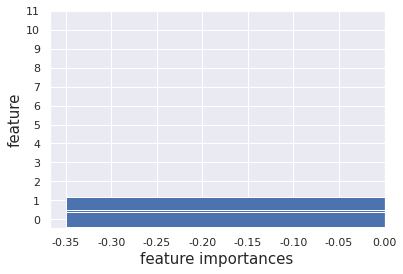

In [ ]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(X_train, y_train)

n_feature = df.shape[1]

index=np.arange(n_feature)



plt.barh( gbc.feature_importances_,width=-0.35)

plt.yticks(index)

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 

TypeError: ignored

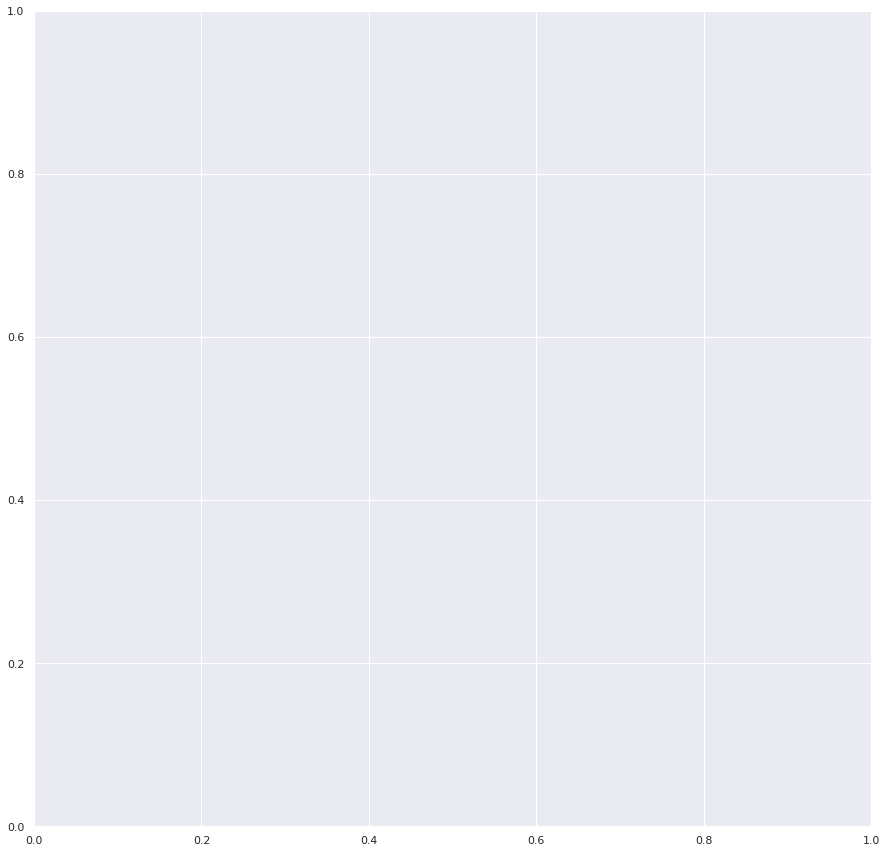

In [ ]:
gbmclf = GradientBoostingClassifier()
gbmclf.fit(X_train,y_train)
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)

plt.barh(gbmclf.feature_importances_,ax = axes,height =0.5)
plt.show();
plt.close()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_

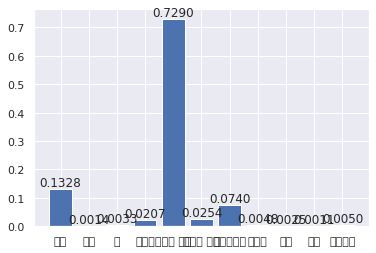

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.feature_importances_
bar = plt.bar(X_train.columns,gbc.feature_importances_)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.4f' % height, ha='center', va='bottom', size = 12)
plt.show()

NameError: ignored

In [ ]:
# X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
# print("\nLogistic Regression")
# # 임곗값 : 0.38
# lr_clf = LogisticRegression()
# lr_clf.fit(X_train, y_train)
# pred = lr_clf.predict(X_test)
# pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
# binarizer = Binarizer(threshold = 0.38).fit(pred_proba)
# predict = binarizer.transform(pred_proba)
# print('임곗값: ', 0.38)
# get_clf_eval(y_test, predict, pred_proba)
# print()

print("\nAdaBoostClassifier")
from sklearn.ensemble import AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth = 8)
ada_clf = AdaBoostClassifier(base_estimator = base_model,  n_estimators = 500, random_state = 10, learning_rate = 1.0)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
pred_proba = ada_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
get_clf_eval(y_test, predict, pred_proba)
print()

# print("\nGradient Boosting Classifier")
# from sklearn.ensemble import GradientBoostingClassifier
# gbm_clf = GradientBoostingClassifier(max_depth = 3, n_estimators=500, learning_rate = 0.05,min_samples_split=12, min_samples_leaf=24) # 12 min_samples_split
# get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
# gbm_clf.fit(X_train, y_train)
# pred = gbm_clf.predict(X_test)
# pred_proba = gbm_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
# get_clf_eval(y_test, predict, pred_proba)
# print()

# print("\nXGB Boosting Classifier")
# from xgboost.sklearn import XGBClassifier
# xgb_clf = XGBClassifier(max_depth = 3,n_estimators=300, random_state=0, learning_rate=0.05, min_samples_split=12, min_samples_leaf=24)
# xgb_clf.fit(X_train, y_train)
# pred = xgb_clf.predict(X_test)
# pred_proba = xgb_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
# get_clf_eval(y_test, predict, pred_proba)
# print()


AdaBoostClassifier
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.7272



In [ ]:
print("\nGradient Boosting Classifier")
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier(max_depth = 3, n_estimators=500, learning_rate = 0.05,min_samples_split=12, min_samples_leaf=24) # 12 min_samples_split
get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)
gbm_clf.fit(X_train, y_train)
pred = gbm_clf.predict(X_test)
pred_proba = gbm_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
get_clf_eval(y_test, predict, pred_proba)
print()

print("\nXGB Boosting Classifier")
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(max_depth = 3,n_estimators=300, random_state=0, learning_rate=0.05, min_samples_split=12, min_samples_leaf=24)
xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1].reshape(-1, 1)
get_clf_eval(y_test, predict, pred_proba)
print()


Gradient Boosting Classifier
오차 행렬
[[4647 1357]
 [1731 4265]]
정확도: 0.7427, 정밀도: 0.7586, 재현율:0.7113, F1:0.7342, AUC:0.8054
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.8054


XGB Boosting Classifier
오차 행렬
[[3437 2567]
 [ 969 5027]]
정확도: 0.7053, 정밀도: 0.6620, 재현율:0.8384, F1:0.7398, AUC:0.8060



In [ ]:
#  F1:0.7400, AUC:0.7961
print("Logistic Regression: ", (0.7400*0.7)+(0.7961*0.3))
# F1:0.7400, AUC:0.7739
print("AdaBoost : ", (0.7400 * 0.7) + (0.7739*0.3))
# F1:0.7400, AUC:0.8012
print("GBM: ", (0.7400*0.7)+(0.8012*0.3))

In [ ]:
X_train, X_test, y_train, y_test = get_validation_dataset_regression(df_impu_outlier)
print("\nAdaBoostClassifier")
ada_clf = AdaBoostClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
get_model_train_eval(ada_clf,  ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

In [ ]:
############################################################################################

In [ ]:
# 경사하강법 활용
from sklearn.decomposition import PCA
df_try = pd.read_csv("train_공개.csv", encoding = "UTF-8")
df_try.drop('id', axis = 1, inplace = True)
# df_try.insert(2, 'bmi', round((df_try['몸무게']/(df_try['키']/100)**2), 2)) # 다중공선성에 의해서 상관계수가 높은 2가지 변수에 대해서 하나의 변수로 보기 위해서 bmi로 만들어줌
# df_try.drop(['키', '몸무게'], axis = 1, inplace = True)
df_try.drop(['음주'], axis = 1, inplace = True)

In [ ]:
#df_impu_outlier1 = imputation_outlier(df_try.copy(), "bmi", 1.5)
df_impu_outlier0 = imputation_outlier(df_try.copy(), "키", 1.5)
df_impu_outlier1 = imputation_outlier(df_impu_outlier0, "몸무게", 1.5)
df_impu_outlier2 = imputation_outlier(df_impu_outlier1, "수축기 혈압", 1.5)
df_impu_outlier3 = imputation_outlier(df_impu_outlier2, "이완기 혈압", 1.5)
df_impu_outlier = df_impu_outlier3

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
sample = df_impu_outlier[df_impu_outlier['label'] == 1][0:3000]
new = pd.concat([df_impu_outlier, sample])
# X_train = df_impu_outlier.iloc[:, :-1]
# y_train = df_impu_outlier.iloc[:, -1]
X_train = new.iloc[:, :-1]
y_train = new.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [ ]:
def get_validation_dataset_regression(df=None): # validation
  df_test_copy = df_test.copy()
  X_features = df_test_copy.iloc[:, :-1]
  y_target = df_test_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 0, stratify=y_target)
  
from sklearn.decomposition import PCA
df_try = pd.read_csv("train_공개.csv", encoding = "UTF-8")
df_try.drop('id', axis = 1, inplace = True)
# df_try.insert(2, 'bmi', round((df_try['몸무게']/(df_try['키']/100)**2), 2)) # 다중공선성에 의해서 상관계수가 높은 2가지 변수에 대해서 하나의 변수로 보기 위해서 bmi로 만들어줌
# df_try.drop(['키', '몸무게'], axis = 1, inplace = True)
df_try.drop(['음주'], axis = 1, inplace = True)

In [ ]:
df_impu_outlier.head()

In [ ]:
df_try = pd.read_csv("test_공개.csv", encoding = "UTF-8")
df_try.drop('id', axis = 1, inplace = True)
# df_try.insert(2, 'bmi', round((df_try['몸무게']/(df_try['키']/100)**2), 2))
df_try.drop(['음주'], axis = 1, inplace = True)

In [ ]:
df_try.head()

In [ ]:
#df_test1 = imputation_outlier(test.copy(), "bmi", 1.5)
df_test0 = imputation_outlier(df_test.copy(), "키", 1.5)
df_test1 = imputation_outlier(df_test0, "몸무게", 1.5)
df_test2 = imputation_outlier(df_test1, "수축기 혈압", 1.5)
df_test3 = imputation_outlier(df_test2, "이완기 혈압", 1.5)
df_test = df_test3

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
df_try.head()

In [ ]:
y_train.head()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# sample = df_impu_outlier[df_impu_outlier['label'] == 1][:24600] # 24500
sample = df_impu_outlier[df_impu_outlier['label'] == 1][:24500] # 24500
new = pd.concat([df_impu_outlier, sample])
# X_train = df_impu_outlier.iloc[:, :-1]
# y_train = df_impu_outlier.iloc[:, -1]
X_train = new.iloc[:, :-1]
y_train = new.iloc[:, -1]

X_test = df_try.iloc[:, :-1]
y_test = df_try.iloc[:, -1]

# over_sampler = RandomOverSampler(random_state = 243)
# X_train_under, y_train_under = over_sampler.fit_resample(X_train, y_train)

from sklearn.model_selection import GridSearchCV
# gbm_clf = GradientBoostingClassifier()
# params = {
#     'n_estimators':[100, 500],
#     'learning_rate':[0.05, 0.1]
# }
# # verbose  0:silent, 1:progressb bar, 2:one line per epoch.
# grid_cv = GridSearchCV(gbm_clf, param_grid = params, cv = 2, verbose = 1)
# grid_cv.fit(X_train, y_train)
# print('최적의 파라미터 :',grid_cv.best_params_)
# print('최고의 예측 정확도 :',grid_cv.best_score_)

gbm_clf = GradientBoostingClassifier()
get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

# from sklearn.ensemble import GradientBoostingClassifier 
# gbm_clf = GradientBoostingClassifier(n_estimator = 500, learning) #max_depth=7, n_estimators = 500, learning_rate = 0.01
# get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

# base_model = DecisionTreeClassifier(max_depth=5)
# ada_clf = AdaBoostClassifier(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# sample = df_impu_outlier[df_impu_outlier['label'] == 1][:24600] # 24500
sample = df_impu_outlier[df_impu_outlier['label'] == 1][:24500] # 24500
new = pd.concat([df_impu_outlier, sample])
# X_train = df_impu_outlier.iloc[:, :-1]
# y_train = df_impu_outlier.iloc[:, -1]
X_train = new.iloc[:, :-1]
y_train = new.iloc[:, -1]

X_test = df_try.iloc[:, :-1]
y_test = df_try.iloc[:, -1]
from sklearn.model_selection import GridSearchCV
# gbm_clf = GradientBoostingClassifier()
# params = {
#     'n_estimators':[100, 500],
#     'learning_rate':[0.05, 0.1]
# }
# # verbose  0:silent, 1:progressb bar, 2:one line per epoch.
# grid_cv = GridSearchCV(gbm_clf, param_grid = params, cv = 2, verbose = 1)
# grid_cv.fit(X_train, y_train)
# print('최적의 파라미터 :',grid_cv.best_params_)
# print('최고의 예측 정확도 :',grid_cv.best_score_)


gbm_clf = GradientBoostingClassifier(max_depth = 3, n_estimators=500, learning_rate = 0.05,min_samples_split=12, min_samples_leaf=24) # 12 min_samples_split
get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


# from sklearn.ensemble import GradientBoostingClassifier 
# gbm_clf = GradientBoostingClassifier(n_estimator = 500, learning) #max_depth=7, n_estimators = 500, learning_rate = 0.01
# get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

# base_model = DecisionTreeClassifier(max_depth=5)
# ada_clf = AdaBoostClassifier(
#                          n_estimators = 100,
#                          learning_rate = 0.3)
# # ada_clf = AdaBoostClassifier(n_estimators=200)
# get_model_train_eval(ada_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)